In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
data =pd.read_csv('50_Startups.csv')

In [4]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [5]:
data.shape

(50, 4)

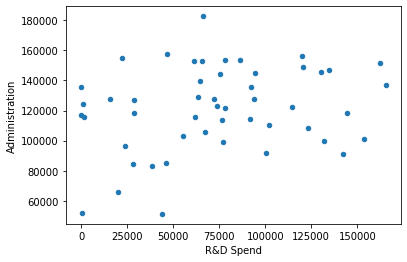

In [6]:
data.plot(kind='scatter', x='R&D Spend', y='Administration')
plt.show()


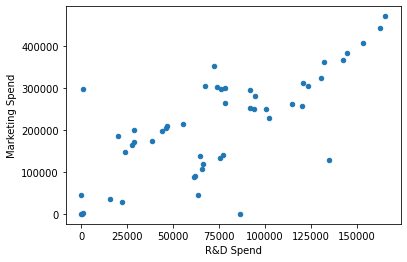

In [37]:
data.plot(kind='scatter', x='R&D Spend', y='Marketing Spend')
plt.show()


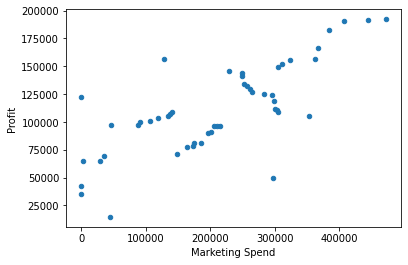

In [7]:
data.plot(kind='scatter', x='Marketing Spend', y='Profit')
plt.show()


In [9]:
data.corr() #Correlation Coefficients

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
#change to dataframe variables
Research=pd.DataFrame(data['R&D Spend'])
Marketing=pd.DataFrame(data['Marketing Spend'])
Administration=pd.DataFrame(data['Administration'])
Profit=pd.DataFrame(data['Profit'])

In [13]:
Research

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [24]:
#Build Linear Regression Model
lm = linear_model.LinearRegression()
model =lm.fit(Research,Marketing)
model1=lm.fit(Administration,Profit)

In [15]:
model.coef_

array([[1.92950273]])

In [16]:
model.intercept_

array([68779.03917876])

In [17]:
model.score(Research, Marketing)

0.5245353582320298

In [30]:
model1.score(Administration, Profit)


0.04028714077757223

In [ ]:
#Predict new value of Research
Research_new=84000
Research_predict=model.predict(Research_new)
Research_predict

In [32]:
#Predict more values
X=([83000,15000,1000])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['Research','Marketing'])
df

c:\Users\sansk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Research,Marketing
,0,0
0,83000,100940.655101
1,15000,81305.709341
2,1000,77263.220508


c:\Users\sansk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- R&D Spend
Feature names seen at fit time, yet now missing:
- Administration

  warnings.warn(message, FutureWarning)


NameError: name 'Research_predict' is not defined

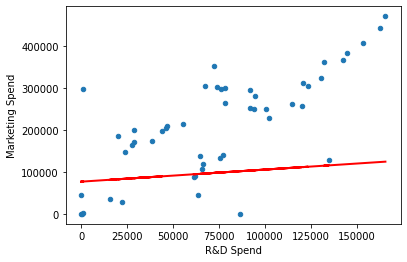

In [47]:
#Visualise the result
data.plot(kind='scatter', x='R&D Spend', y='Marketing Spend')
#plotting the Regression line
plt.plot(Research,model.predict(Research),color='red',linewidth=2)
#plotting the predict value
plt.scatter(Research_new, Research_predict, color='black')
plt.plot(X, Y, color='black', linewidth=5)
plt.show()